#### Create an Agent

In [6]:
from dotenv import load_dotenv
load_dotenv()


True

#### Creating a Tools

In [7]:
#### Custom Tools

def add(a:int,b:int)->int:
    """Add two numbers"""
    return a+b

def multiply(a:int,b:int)->int:
    """Multiply two numbers"""
    return a*b

def divide(a:int,b:int)->int:
    """Divide two numbers"""
    return a/b



#### Langchain tools    

In [8]:
from langchain_community.utilities import ArxivAPIWrapper,WikipediaAPIWrapper,GoogleSearchAPIWrapper
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun,GoogleSearchRun
from langchain_community.tools.tavily_search import TavilySearchResults

arxiv_wrapper = ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv = ArxivQueryRun(api_wrapper=arxiv_wrapper)

wikipedia_wrapper = WikipediaAPIWrapper(top_k_results=5,doc_content_chars_max=500)
wikipedia = WikipediaQueryRun(api_wrapper=wikipedia_wrapper)

tavily = TavilySearchResults()


In [9]:
tools = [add,divide,multiply,arxiv,wikipedia,tavily]

#### Creating a Model

In [10]:
from langchain_groq import ChatGroq

model = ChatGroq(model_name="llama-3.1-8b-instant")


#### Create Agent

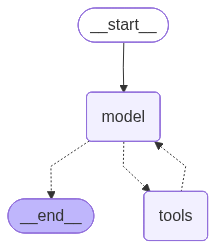

In [11]:
from langchain.agents import create_agent

agent = create_agent(
    tools=tools,
    model=model
)

agent

In [12]:
import os
os.environ["LANGCHAIN_TRACING_V2"] = "false"


In [13]:
agent.invoke({
    "messages":[{
        "role":"user",
        "content":"What is the attention all you need paper?"
    }]
})

{'messages': [HumanMessage(content='What is the attention all you need paper?', additional_kwargs={}, response_metadata={}, id='22bd2880-25f3-4cfa-8a02-e5829f253afc'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'ehvr5ked2', 'function': {'arguments': '{"query":"attention all you need paper"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 711, 'total_tokens': 730, 'completion_time': 0.025485188, 'completion_tokens_details': None, 'prompt_time': 0.07962189, 'prompt_tokens_details': None, 'queue_time': 0.067249089, 'total_time': 0.105107078}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019ba63a-fbf4-7651-a8a4-a81d2f2efbc8-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'attention all you need paper'}, 'id': 'ehvr5ked2', 'type': 'tool_call'}], us

In [53]:
agent.invoke({
    "messages":[{
        "role":"user",
        "content":"What is the result of 2+2?"
    }]
})

{'messages': [HumanMessage(content='What is the result of 2+2?', additional_kwargs={}, response_metadata={}, id='8b0654a8-202f-42fc-9016-5dd8d52d0a59'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '5qzt3yqmq', 'function': {'arguments': '{"a":2,"b":2}', 'name': 'add'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 712, 'total_tokens': 730, 'completion_time': 0.027702186, 'completion_tokens_details': None, 'prompt_time': 0.039728916, 'prompt_tokens_details': None, 'queue_time': 0.055379534, 'total_time': 0.067431102}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b7271-4649-7430-88de-e55a4f18c1f4-0', tool_calls=[{'name': 'add', 'args': {'a': 2, 'b': 2}, 'id': '5qzt3yqmq', 'type': 'tool_call'}], usage_metadata={'input_tokens': 712, 'output_tokens': 18, 'total_tokens'

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


In [55]:
agent.invoke({
    "messages":[{
        "role":"user",
        "content":"What is machine learning using tavily?"
    }]
})

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')
Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


{'messages': [HumanMessage(content='What is machine learning using tavily?', additional_kwargs={}, response_metadata={}, id='75c3a146-feec-4a74-a5f4-7cb29ab2ad7f'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'vwdvw506g', 'function': {'arguments': '{"query":"machine learning definition tavily"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 710, 'total_tokens': 732, 'completion_time': 0.02555581, 'completion_tokens_details': None, 'prompt_time': 0.063634679, 'prompt_tokens_details': None, 'queue_time': 0.056733641, 'total_time': 0.089190489}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b7271-f739-7d31-8612-81ad1657648a-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'machine learning definition tav

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


In [ ]:
from langchain.agents import create_agent
from langchain.memory import ConversationBufferMemory
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a customer support AI that answers using tools only when needed."),
    ("human", "{input}")
])

memory = ConversationBufferMemory(
    memory_key="chat_history",
    return_messages=True
)

agent = create_agent(
    tools=tools,
    model=model,
    prompt=prompt,
    agent_type="openai-tools",
    memory=memory,
    verbose=True,
    handle_parsing_errors=True,
    max_iterations=5,
    return_intermediate_steps=True
)
